# Requeriments

In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [17]:
df = pd.read_csv("/mnt/workstation/data/DataXid_full_ok.csv")
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)
df

,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,mediana_nom3,...,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero
0,36,0,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,1178.0,6.0,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M
1,33,3,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,966.0,5.0,1,UNION LIBRE,UNIVERSITARIO,VETERINARIA,Independiente,SANDONA,D,F
2,34,1,0,0,0,0.000000e+00,8230,1.0,0.0,0.0,...,1192.0,6.0,2,UNION LIBRE,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,TENERIFE,C,M
3,27,1,0,0,0,1.328622e+07,10,1.0,0.0,0.0,...,616.0,5.0,2,SOLTERO,BACHILLER,OTROS,Empleado,PEDRAZA,D,M
4,29,1,0,0,0,0.000000e+00,1410,1.0,0.0,0.0,...,616.0,6.0,2,SOLTERO,TECNOLOGO,DISEÑO Y PUBLICIDAD,Independiente,PEDRAZA,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,36,0,0,0,0,3.375928e+06,4724,1.0,0.0,0.0,...,616.0,6.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Comerciante,PEDRAZA,F,M
1047951,34,1,0,0,0,0.000000e+00,8299,1.0,0.0,0.0,...,616.0,6.0,1,SOLTERO,UNIVERSITARIO,MERCADOTECNIA,Independiente,PEDRAZA,C,F
1047952,25,0,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,616.0,5.0,1,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Empleado,PEDRAZA,D,F
1047953,30,0,0,0,0,1.922503e+06,10,1.0,0.0,2302697.0,...,1117.0,2.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Empleado,ARMENIA,H,M


In [18]:
X = pd.read_csv("/mnt/workstation/data/Xid_Variables.csv")
list(X['Selected_variables'])

['ind',
 'mediana_nom3',
 'tiene_cred_hipo_1',
 'cupo_total_tc',
 'tiene_cred_hipo_2',
 'rep_calif_cred',
 'ingreso_final',
 'cuota_de_consumo',
 'ctas_activas',
 'cuota_sector_real_comercio',
 'nivel_academico',
 'genero',
 'cuota_de_vivienda',
 'profesion',
 'cupo_tc_mdo',
 'tiene_consumo',
 'cuota_de_sector_solidario',
 'saldo_no_rot_mdo',
 'tenencia_tc',
 'tiene_crediagil',
 'ciudad_residencia_tag_gasto_familiar',
 'ocupacion',
 'ciudad_residencia',
 'estado_civil',
 'ocupacion_tag_gasto_familiar',
 'cuota_rotativos',
 'mora_max',
 'rep_calif_cred_tag_gasto_familiar',
 'cant_mora_30_tdc_ult_3m_sf',
 'profesion_tag_gasto_familiar',
 'pension_fopep',
 'ocupacion_tag_ind',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_ingreso_nompen',
 'gasto_familiar']

In [19]:
df = df[list(X['Selected_variables'])]
df

,ind,mediana_nom3,tiene_cred_hipo_1,cupo_total_tc,tiene_cred_hipo_2,rep_calif_cred,ingreso_final,cuota_de_consumo,ctas_activas,cuota_sector_real_comercio,...,cuota_rotativos,mora_max,rep_calif_cred_tag_gasto_familiar,cant_mora_30_tdc_ult_3m_sf,profesion_tag_gasto_familiar,pension_fopep,ocupacion_tag_ind,nivel_academico_tag_gasto_familiar,profesion_tag_ingreso_nompen,gasto_familiar
0,5.619513e+05,0.0,0,0.000000e+00,0,C,1.244439e+06,1.043989e+05,1.0,0.000000e+00,...,0.000000,0,5.0,0,7.0,0,1.0,1.0,22.0,1.792900e+05
1,3.367786e+06,0.0,0,0.000000e+00,0,D,6.297243e+06,6.056656e+04,1.0,2.637415e+04,...,0.000000,3,3.0,0,62.0,0,9.0,3.0,40.0,1.570146e+06
2,1.784371e+06,0.0,0,0.000000e+00,0,C,3.265615e+06,0.000000e+00,1.0,0.000000e+00,...,0.000000,1,5.0,0,46.0,0,9.0,3.0,49.0,4.818113e+05
3,-2.987449e+06,0.0,0,1.328622e+07,0,D,5.638513e+06,3.005105e+06,1.0,0.000000e+00,...,17544.984910,1,3.0,0,44.0,0,1.0,4.0,54.0,9.242045e+05
4,6.778628e+05,0.0,0,0.000000e+00,0,C,1.326788e+06,1.437719e+04,1.0,2.617936e+04,...,0.000000,1,5.0,0,38.0,0,9.0,1.0,11.0,2.162112e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,1.733536e+06,0.0,0,3.375928e+06,0,F,3.604066e+06,0.000000e+00,1.0,0.000000e+00,...,0.000000,0,6.0,0,46.0,0,10.0,4.0,50.0,3.207775e+05
1047951,-1.201849e+07,0.0,0,0.000000e+00,0,C,2.039754e+06,1.186929e+05,1.0,9.845653e+06,...,0.000000,1,5.0,0,45.0,0,9.0,3.0,49.0,1.575005e+05
1047952,1.981081e+06,0.0,0,0.000000e+00,0,D,2.466293e+06,6.052049e+04,1.0,1.214438e+05,...,5699.343622,0,3.0,0,46.0,0,1.0,3.0,49.0,7.649322e+05
1047953,1.189505e+06,2302697.0,0,1.922503e+06,0,H,2.182528e+06,0.000000e+00,1.0,0.000000e+00,...,0.000000,0,1.0,0,46.0,0,1.0,4.0,49.0,1.156982e+05


In [20]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [21]:
features_f

Index(['ind', 'mediana_nom3', 'cupo_total_tc', 'ingreso_final',
       'cuota_de_consumo', 'ctas_activas', 'cuota_sector_real_comercio',
       'cuota_de_vivienda', 'cupo_tc_mdo', 'cuota_de_sector_solidario',
       'saldo_no_rot_mdo', 'ciudad_residencia_tag_gasto_familiar',
       'ocupacion_tag_gasto_familiar', 'cuota_rotativos',
       'rep_calif_cred_tag_gasto_familiar', 'profesion_tag_gasto_familiar',
       'ocupacion_tag_ind', 'nivel_academico_tag_gasto_familiar',
       'profesion_tag_ingreso_nompen', 'gasto_familiar'],
      dtype='object')

In [22]:
df[features_o].describe(include='all').T

,count,unique,top,freq
rep_calif_cred,1047955,8,A,221248
nivel_academico,1047955,6,UNIVERSITARIO,574574
genero,1047955,2,M,530231
profesion,1047955,79,OTROS,296452
ocupacion,1047955,10,Empleado,664455
ciudad_residencia,1047955,899,PEDRAZA,266005
estado_civil,1047955,5,SOLTERO,482249


# One-Hot Encoding

In [23]:
df_onehot = pd.get_dummies(df, columns=features_o)
list(df_onehot.columns)

['ind',
 'mediana_nom3',
 'tiene_cred_hipo_1',
 'cupo_total_tc',
 'tiene_cred_hipo_2',
 'ingreso_final',
 'cuota_de_consumo',
 'ctas_activas',
 'cuota_sector_real_comercio',
 'cuota_de_vivienda',
 'cupo_tc_mdo',
 'tiene_consumo',
 'cuota_de_sector_solidario',
 'saldo_no_rot_mdo',
 'tenencia_tc',
 'tiene_crediagil',
 'ciudad_residencia_tag_gasto_familiar',
 'ocupacion_tag_gasto_familiar',
 'cuota_rotativos',
 'mora_max',
 'rep_calif_cred_tag_gasto_familiar',
 'cant_mora_30_tdc_ult_3m_sf',
 'profesion_tag_gasto_familiar',
 'pension_fopep',
 'ocupacion_tag_ind',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_ingreso_nompen',
 'gasto_familiar',
 'rep_calif_cred_A',
 'rep_calif_cred_B',
 'rep_calif_cred_C',
 'rep_calif_cred_D',
 'rep_calif_cred_E',
 'rep_calif_cred_F',
 'rep_calif_cred_G',
 'rep_calif_cred_H',
 'nivel_academico_BACHILLER',
 'nivel_academico_ESPECIALIZACION',
 'nivel_academico_NINGUNO',
 'nivel_academico_PRIMARIO',
 'nivel_academico_TECNOLOGO',
 'nivel_academico_UNIV

In [24]:
df_onehot

,ind,mediana_nom3,tiene_cred_hipo_1,cupo_total_tc,tiene_cred_hipo_2,ingreso_final,cuota_de_consumo,ctas_activas,cuota_sector_real_comercio,cuota_de_vivienda,...,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO
0,5.619513e+05,0.0,0,0.000000e+00,0,1.244439e+06,1.043989e+05,1.0,0.000000e+00,0.0,...,0,0,0,0,0,0,1,0,0,0
1,3.367786e+06,0.0,0,0.000000e+00,0,6.297243e+06,6.056656e+04,1.0,2.637415e+04,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1.784371e+06,0.0,0,0.000000e+00,0,3.265615e+06,0.000000e+00,1.0,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,1,0
3,-2.987449e+06,0.0,0,1.328622e+07,0,5.638513e+06,3.005105e+06,1.0,0.000000e+00,0.0,...,0,0,0,0,0,0,0,1,0,0
4,6.778628e+05,0.0,0,0.000000e+00,0,1.326788e+06,1.437719e+04,1.0,2.617936e+04,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,1.733536e+06,0.0,0,3.375928e+06,0,3.604066e+06,0.000000e+00,1.0,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,1,0
1047951,-1.201849e+07,0.0,0,0.000000e+00,0,2.039754e+06,1.186929e+05,1.0,9.845653e+06,0.0,...,0,0,0,0,0,0,0,1,0,0
1047952,1.981081e+06,0.0,0,0.000000e+00,0,2.466293e+06,6.052049e+04,1.0,1.214438e+05,0.0,...,0,0,0,0,0,0,1,0,0,0
1047953,1.189505e+06,2302697.0,0,1.922503e+06,0,2.182528e+06,0.000000e+00,1.0,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df_onehot.shape

(1047955, 1037)

# PCA - _Principal Component Analysis_

## Standardization

In [26]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1047955.0,-0.0,1.0,-321.90,-0.09,-0.04,0.05,39.46
1,1047955.0,-0.0,1.0,-0.40,-0.40,-0.40,0.16,188.64
2,1047955.0,0.0,1.0,-0.02,-0.02,-0.02,-0.02,60.95
3,1047955.0,0.0,1.0,-0.43,-0.43,-0.43,0.03,53.70
4,1047955.0,0.0,1.0,-0.02,-0.02,-0.02,-0.02,60.95
...,...,...,...,...,...,...,...,...
1032,1047955.0,0.0,1.0,-0.61,-0.61,-0.61,1.64,1.64
1033,1047955.0,-0.0,1.0,-0.38,-0.38,-0.38,-0.38,2.61
1034,1047955.0,-0.0,1.0,-0.92,-0.92,-0.92,1.08,1.08
1035,1047955.0,-0.0,1.0,-0.37,-0.37,-0.37,-0.37,2.68


In [27]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [28]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False, ignore_index = True)
PCA['Participacion'] = PCA['Autovalor']/PCA['Autovalor'].sum()*100
PCA['Acumulado'] = PCA['Participacion'].cumsum()
PCA.head(50)

,Variable,Autovalor,Participacion,Acumulado
0,ind,3.681407e+06,0.338760,0.338760
1,mediana_nom3,3.492987e+06,0.321422,0.660182
2,tiene_cred_hipo_1,2.928401e+06,0.269469,0.929651
3,cupo_total_tc,2.795408e+06,0.257231,1.186883
4,tiene_cred_hipo_2,2.398510e+06,0.220709,1.407592
5,ingreso_final,2.333635e+06,0.214739,1.622331
6,cuota_de_consumo,2.166260e+06,0.199338,1.821669
7,ctas_activas,2.112341e+06,0.194376,2.016045
8,cupo_tc_mdo,2.000932e+06,0.184124,2.200169
9,tiene_consumo,1.905433e+06,0.175336,2.375505


Text(0.5, 1.0, 'Componentes Principales')

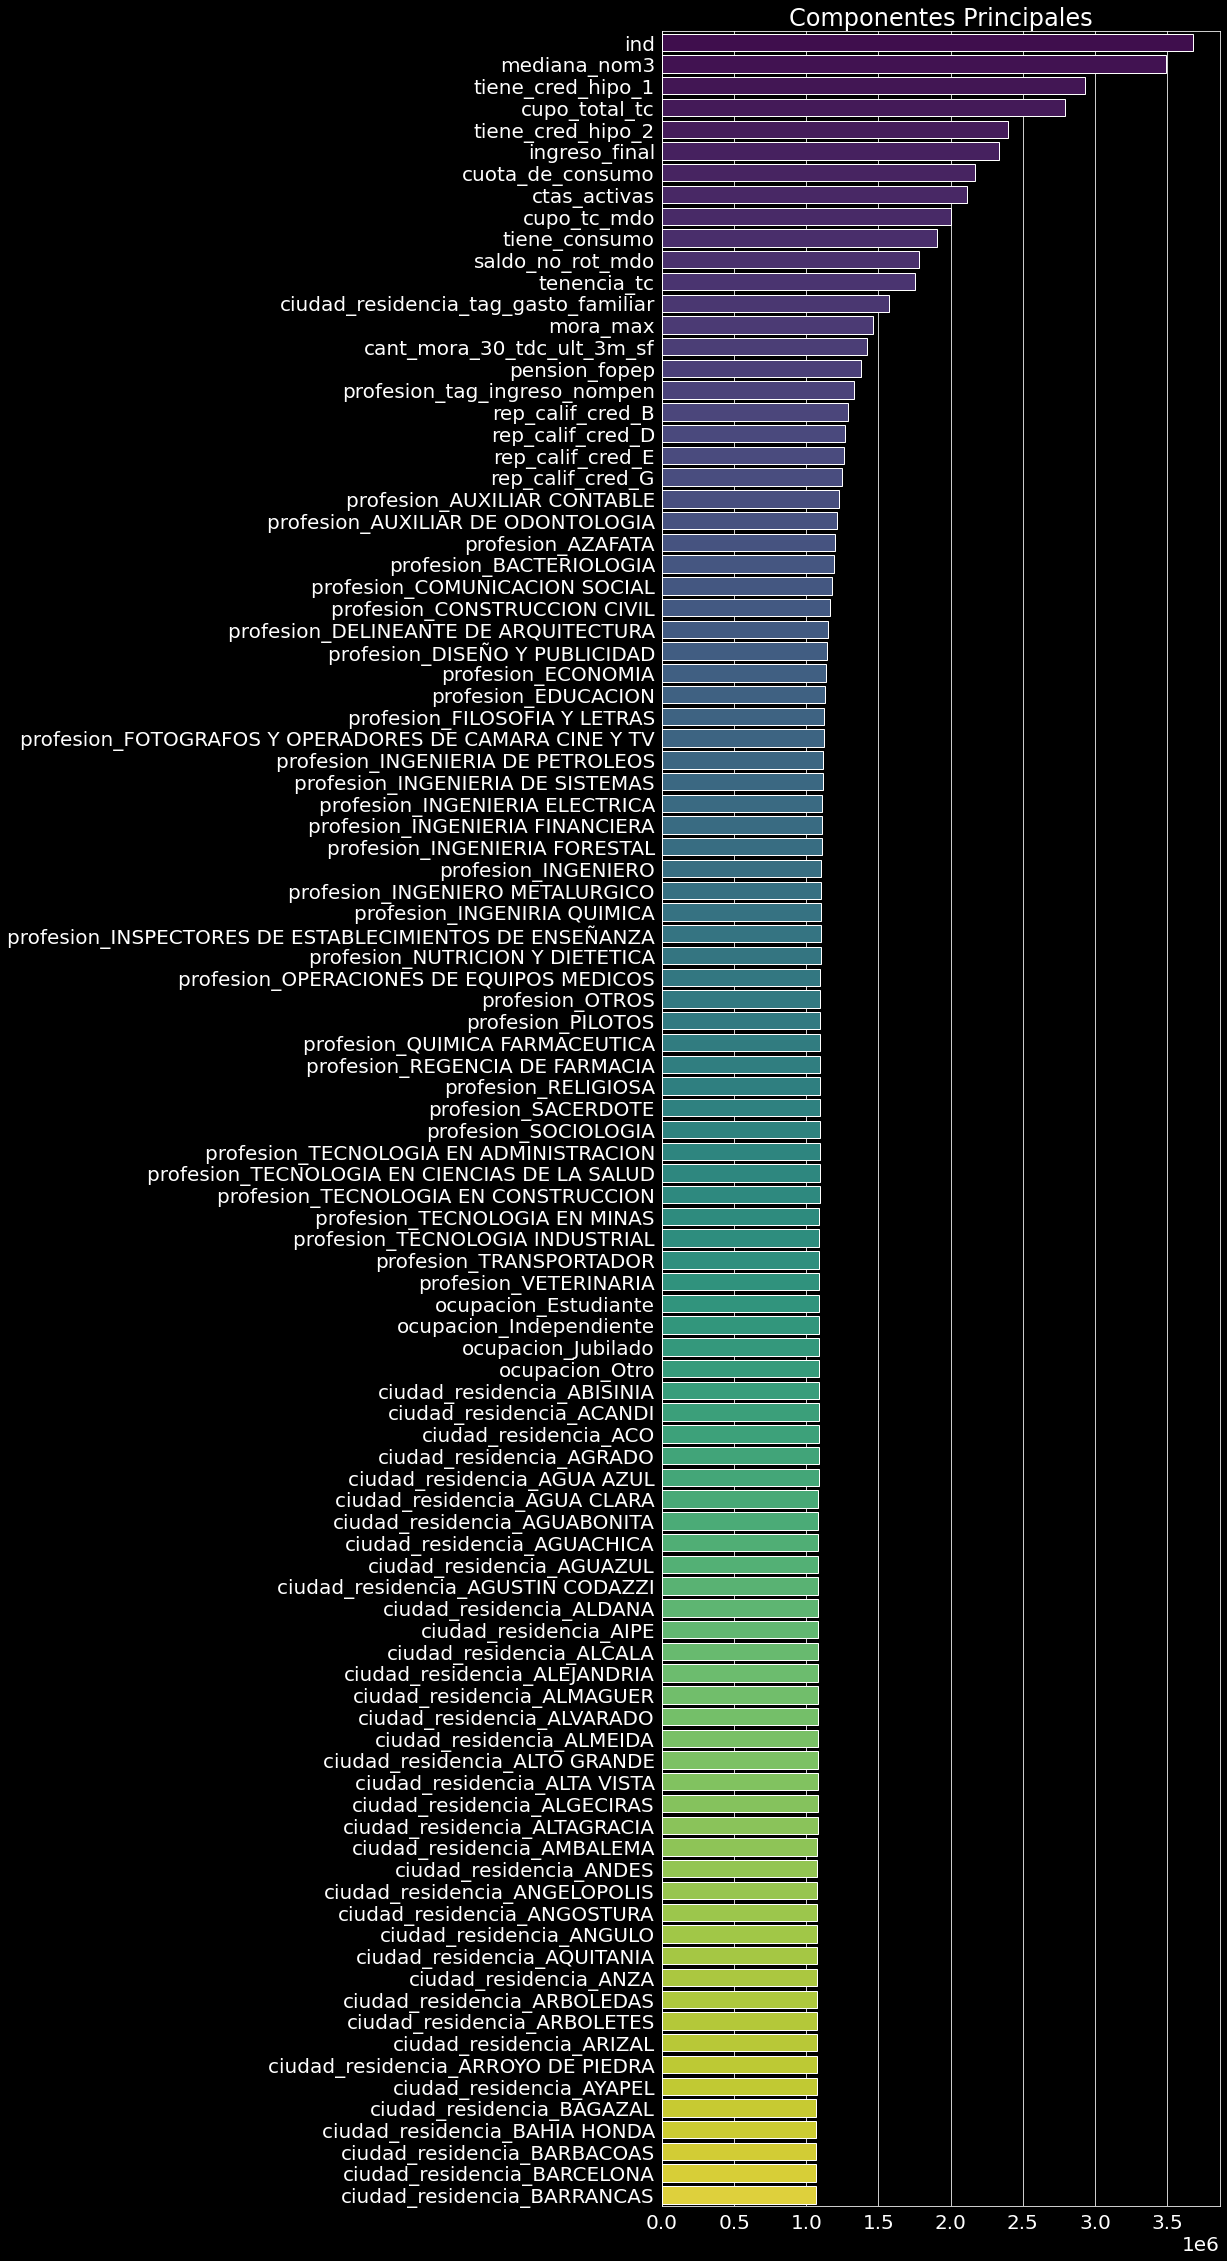

In [29]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Componentes Principales")

Text(0.5, 1.0, 'Componentes Principales DataXid')

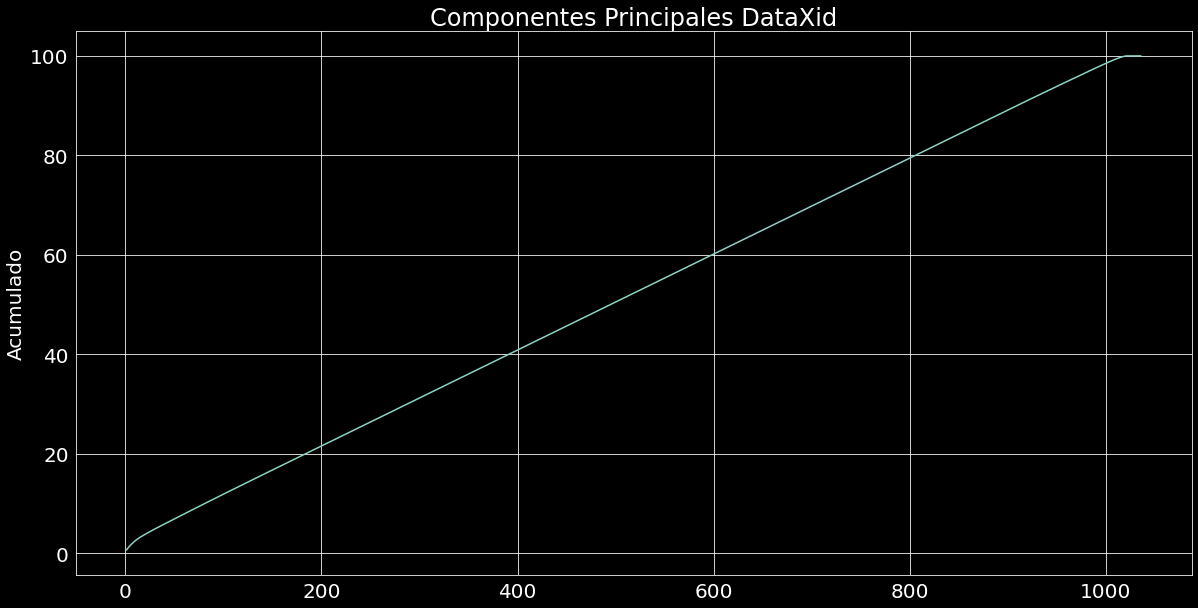

In [30]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
y = PCA.loc[1:PCA.shape[0],'Acumulado']
x = range(1,PCA.shape[0])
sns.lineplot(x=x, y=y, palette="69d")
plt.title("Componentes Principales DataXid")

In [31]:
PCA.to_csv("/mnt/workstation/data/PCA_Xid.csv", index=False)